# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

Goal for Scenario #2: Your task is to:

Build models of total sales based on location, price per bottle, total bottles sold. You may find it useful to build models for each county, zip code, or city.

Provide a table of the best performing stores by location type of your choice (city, county, or zip code) and the predictions of your model(s).

Based on your models and the table of data, recommend some general locations to the business owner, taking into account model performance. Validate your model's performance and ability to predict future sales using cross-validation.

Bonus: Recommend targets for volume sold and price per bottle!

In [1]:
import pandas as pd
import numpy as np

## Loading the smaller 10% data into a DataFrame
df = pd.read_csv('Sample_Set_Iowa_Liquor_sales_sample_10pct.csv')

## Transform the dates if needed, e.g.

df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)

/Users/punkymonkey/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1041: UserWarning: Duplicate key in file "/Users/punkymonkey/.matplotlib/matplotlibrc", line #2
  (fname, cnt))


In [2]:
#printing the columns or features of the data
df.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

In [3]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,$9.50,$14.25,6,$85.50,10.5,2.77
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,$7.20,$10.80,12,$129.60,21.0,5.55


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null datetime64[ns]
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: datetime64

In [5]:
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [6]:
 df.groupby(['Category Name']).size().sort_values(ascending=False)

Category Name
VODKA 80 PROOF                        35373
CANADIAN WHISKIES                     27087
STRAIGHT BOURBON WHISKIES             15342
SPICED RUM                            14631
VODKA FLAVORED                        14001
TEQUILA                               12109
BLENDED WHISKIES                      11547
WHISKEY LIQUEUR                       10902
IMPORTED VODKA                        10668
PUERTO RICO & VIRGIN ISLANDS RUM      10062
FLAVORED RUM                           7282
TENNESSEE WHISKIES                     7081
AMERICAN COCKTAILS                     6929
AMERICAN GRAPE BRANDIES                6589
AMERICAN DRY GINS                      6559
IMPORTED VODKA - MISC                  6506
MISC. IMPORTED CORDIALS & LIQUEURS     6299
CREAM LIQUEURS                         6284
SCOTCH WHISKIES                        5375
IMPORTED GRAPE BRANDIES                4614
IMPORTED SCHNAPPS                      4249
MISC. AMERICAN CORDIALS & LIQUEURS     3394
100 PROOF VODKA   

In [7]:
#  The counties in which the most volume was sold was revealed with
County_sales_df = df.groupby(['County','Volume Sold (Liters)']).size().sort_values(ascending=False)

In [8]:
print County_sales_df

County         Volume Sold (Liters)
Polk           9.00                    11765
               10.50                    5747
Linn           9.00                     4557
Polk           1.50                     4208
               0.75                     3678
Scott          9.00                     3499
Polk           2.25                     3086
Johnson        9.00                     3066
Black Hawk     9.00                     2970
Linn           10.50                    2830
Polk           4.50                     2436
               12.00                    2129
               3.00                     2108
Linn           2.25                     2093
               1.50                     2078
Woodbury       9.00                     1963
Scott          10.50                    1940
Pottawattamie  9.00                     1875
Story          9.00                     1735
Johnson        10.50                    1660
Black Hawk     1.50                     1600
               10.5

In [9]:
#Creating function which turns the columns with dollar signs into simple floats. 
def change_float(i):
        j = i.strip('$')
        return float(j)   
    
df['State Bottle Cost'] =  df['State Bottle Cost'].apply(change_float)
df['State Bottle Retail'] = df['State Bottle Retail'].apply(change_float)
df['Sale (Dollars)'] = df['Sale (Dollars)'].apply(change_float)

In [10]:
df['price_per_liter'] = df['Sale (Dollars)'] / df['Volume Sold (Liters)']

In [11]:
#clean zip code columns.  creating a table Called ZiP which includes the following data used to compile a list 
#of Counties not present in our original data set

ZiP = df.groupby(['Zip Code', 'County', 'County Number']).mean()
ZiP = ZiP.reset_index(level=[0,1,2])[['Zip Code', 'County', 'County Number']]
print ZiP.shape

(426, 3)


In [12]:
#Now I remove duplicate Zip Codes that belong to mulitple counties.  Creating a table called Zip.

ZiP.drop_duplicates('Zip Code', keep = 'first', inplace=True)
print ZiP.shape, 'the new shape after removing duplicate zip codes'
ZiP.head(3)

(412, 3) the new shape after removing duplicate zip codes


,Zip Code,County,County Number
0,50002,Adair,1.0
1,50003,Dallas,25.0
2,50006,Hardin,42.0


In [13]:
#Now I will clean the category columns.  Creating a Table called Drinks. 

drinks = df.groupby(['Item Number', 'Category', 'Category Name']).mean()
drinks = drinks.reset_index(level=[0,1,2])[['Item Number', 'Category', 'Category Name']]
print drinks.shape

print 'There are', drinks[drinks.duplicated('Item Number') == True].shape[0] ,'duplicate values in the drinks table'

(2781, 3)
There are 104 duplicate values in the drinks table


In [14]:
drinks

,Item Number,Category,Category Name
0,168,1701100.0,DECANTERS & SPECIALTY PACKAGES
1,173,1701100.0,DECANTERS & SPECIALTY PACKAGES
2,220,1701100.0,DECANTERS & SPECIALTY PACKAGES
3,238,1701100.0,DECANTERS & SPECIALTY PACKAGES
4,249,1701100.0,DECANTERS & SPECIALTY PACKAGES
5,258,1081200.0,CREAM LIQUEURS
6,266,1022100.0,TEQUILA
7,297,1701100.0,DECANTERS & SPECIALTY PACKAGES
8,308,1011300.0,TENNESSEE WHISKIES
9,312,1701100.0,DECANTERS & SPECIALTY PACKAGES


In [15]:
#Here I remove duplicate Item Numbers that have more than one Category
drinks.drop_duplicates('Item Number', keep = 'first', inplace=True)
print drinks.shape, 'the new shape after removing duplicate item numbers'
drinks.head(3)

df_new = df.drop(['County Number', 'County'], axis = 1).merge(ZiP, how = 'left', on = 'Zip Code')
df_new = df_new.drop(['Category', 'Category Name'], axis = 1).merge(drinks, how = 'left', on = 'Item Number')

#dropping NaN values 
Sales_df = df_new.dropna()

(2677, 3) the new shape after removing duplicate item numbers


###### The  Above table Sales_df  is a new dataframe where I have removed county, county numer, category, and category name and replaced those columns with drinks, which contains item number, category and category without missing values .  The same was done for the columns dealing with county.  The blanks removed and filled with names cross references with the zip data frame. 

In [16]:
Sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270886 entries, 0 to 270954
Data columns (total 19 columns):
Date                     270886 non-null datetime64[ns]
Store Number             270886 non-null int64
City                     270886 non-null object
Zip Code                 270886 non-null object
Vendor Number            270886 non-null int64
Item Number              270886 non-null int64
Item Description         270886 non-null object
Bottle Volume (ml)       270886 non-null int64
State Bottle Cost        270886 non-null float64
State Bottle Retail      270886 non-null float64
Bottles Sold             270886 non-null int64
Sale (Dollars)           270886 non-null float64
Volume Sold (Liters)     270886 non-null float64
Volume Sold (Gallons)    270886 non-null float64
price_per_liter          270886 non-null float64
County                   270886 non-null object
County Number            270886 non-null float64
Category                 270886 non-null float64
Category Name 

In [17]:
Sales_df.head(10)

,Date,Store Number,City,Zip Code,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),price_per_liter,County,County Number,Category,Category Name
0,2015-11-04,3717,SUMNER,50674,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,9.000000,Bremer,9.0,1051100.0,APRICOT BRANDIES
1,2016-03-02,2614,DAVENPORT,52807,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.50,0.40,27.506667,Scott,82.0,1011100.0,BLENDED WHISKIES
2,2016-02-11,2106,CEDAR FALLS,50613,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.00,6.34,18.890000,Black Hawk,7.0,1011200.0,STRAIGHT BOURBON WHISKIES
3,2016-02-03,2501,AMES,50010,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.50,2.77,8.142857,Story,85.0,1071100.0,AMERICAN COCKTAILS
4,2015-08-18,3654,BELMOND,50421,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.00,5.55,6.171429,Wright,99.0,1031080.0,VODKA 80 PROOF
5,2015-04-20,2569,CEDAR RAPIDS,52402,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,10.50,2.77,11.417143,Linn,57.0,1041100.0,AMERICAN DRY GINS
6,2015-08-05,2596,OTTUMWA,52501,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,2.25,0.59,13.320000,Wapello,90.0,1051010.0,AMERICAN GRAPE BRANDIES
7,2015-06-25,3456,CLEAR LAKE,50428,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,3.50,0.92,13.502857,Cerro Gordo,17.0,1012100.0,CANADIAN WHISKIES
8,2016-01-04,4757,BONDURANT,50035,370,34006,Absolut Swedish Vodka 80 Prf,750,11.49,17.24,4,68.96,3.00,0.79,22.986667,Polk,77.0,1032080.0,IMPORTED VODKA
9,2015-11-10,4346,SHELLSBURG,52332,65,82610,Dekuyper Hot Damn!,1000,7.62,11.43,2,22.86,2.00,0.53,11.430000,Benton,6.0,1081315.0,CINNAMON SCHNAPPS


In [18]:
df['Margins'] = (df['State Bottle Retail'] / df['State Bottle Cost']) - 1

In [19]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),price_per_liter,Margins
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.0,2.38,9.000000,0.500000
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,13.75,20.63,2,41.26,1.5,0.40,27.506667,0.500364
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,12.59,18.89,24,453.36,24.0,6.34,18.890000,0.500397
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,1800 Ultimate Margarita,1750,9.50,14.25,6,85.50,10.5,2.77,8.142857,0.500000
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,21.0,5.55,6.171429,0.500000


In [20]:
#Creating Profit column which is (SB Retail - SB Cost)*(Bottles Sold)

df['Profit'] = (df['State Bottle Retail'] - df['State Bottle Cost'])*df['Bottles Sold']

In [21]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),price_per_liter,Margins,Profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,9.000000,0.500000,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,27.506667,0.500364,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,18.890000,0.500397,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,8.142857,0.500000,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.0,5.55,6.171429,0.500000,43.20


In [22]:
D = df.pivot_table('Profit', index=['Zip Code'], columns=['Item Description'], aggfunc=sum, margins=True)

In [23]:
Total_Profit = D['All']

In [24]:
#I create a new datafram, named Zip_Data, from our origal dataframe to find the number of 
#stores per zip code.  
Zip_Data = df[['Zip Code', 'Store Number']] 
Zip_Data.head()

,Zip Code,Store Number
0,50674,3717
1,52807,2614
2,50613,2106
3,50010,2501
4,50421,3654


In [25]:
#After we created our DataFrame Zip_Data which includes Store Number's and zip codes I group by zip code and call the
#not nunique() to create a count of store's per zip code
Zip = Zip_Data.groupby('Zip Code')['Store Number'].nunique()
Zip

Zip Code
50002     2
50003     3
50006     2
50009     9
50010    21
50014     4
50020     2
50021    12
50022     7
50023     9
50025     3
50028     2
50033     1
50035     1
50036     9
50044     1
50046     1
50047     2
50048     1
50049     3
50054     2
50056     1
50058     2
50060     1
50061     1
50069     2
50071     1
50072     1
50075     1
50076     1
         ..
52641     5
52653     3
52655     5
52656     1
52722    12
52726     1
52728     1
52730     1
52732     9
52733     2
52738     2
52742     2
52747     1
52748     4
52751     1
52753     5
52761    15
52768     1
52772     3
52776     3
52777     1
52778     2
52801     1
52802     9
52803     6
52804    10
52806     8
52807     9
56201     1
712-2     1
Name: Store Number, dtype: int64

In [26]:
#Creating a list of my Zip column detailing the Count of stores per zip code and the Total amount of profit per zip cod
Sales_Zip_Profit = [Total_Profit, Zip]

In [27]:
#Concating to create a new dataframe yeilding profit per zip code 
Sales_Zip_Profit = pd.concat(Sales_Zip_Profit, axis=1)
Sales_Zip_Profit.head()



,All,Store Number
50002,1961.32,2.0
50003,15962.60,3.0
50006,4101.28,2.0
50009,99718.17,9.0
50010,311811.98,21.0


In [28]:
#Next I create a column Averaging Store Profit per Zip code 
Sales_Zip_Profit['Avg. Profit/Store/Zip'] = Sales_Zip_Profit['All'] / Sales_Zip_Profit['Store Number']


In [29]:
Sales_Zip_Profit.columns

Index([u'All', u'Store Number', u'Avg. Profit/Store/Zip'], dtype='object')

In [30]:
Sales_Zip_Profit['Zip Code'] = Sales_Zip_Profit.index #set the Zip code as an index 

In [31]:
Sales_Zip_Profit['Number of Stores'] = Sales_Zip_Profit['Store Number']
Sales_Zip_Profit.head()

,All,Store Number,Avg. Profit/Store/Zip,Zip Code,Number of Stores
50002,1961.32,2.0,980.660000,50002,2.0
50003,15962.60,3.0,5320.866667,50003,3.0
50006,4101.28,2.0,2050.640000,50006,2.0
50009,99718.17,9.0,11079.796667,50009,9.0
50010,311811.98,21.0,14848.189524,50010,21.0


In [32]:
#Changing the index  of the new data frame Sales_Zip_Profit from Zip to integers
Sales_Zip_Profit.reset_index(level=[0,1,2,3])[['All', 'Number of Stores','Avg. Profit/Store/Zip', 'Zip Code']]

,All,Number of Stores,Avg. Profit/Store/Zip,Zip Code
0,1.961320e+03,2.0,980.660000,50002
1,1.596260e+04,3.0,5320.866667,50003
2,4.101280e+03,2.0,2050.640000,50006
3,9.971817e+04,9.0,11079.796667,50009
4,3.118120e+05,21.0,14848.189524,50010
5,1.628535e+04,4.0,4071.337500,50014
6,3.469750e+03,2.0,1734.875000,50020
7,1.688287e+05,12.0,14069.058333,50021
8,4.023938e+04,7.0,5748.482857,50022
9,7.138613e+04,9.0,7931.792222,50023


In [33]:
Sales_Zip_Profit['Total Profit'] = Sales_Zip_Profit['All']

In [34]:
del Sales_Zip_Profit['All']

In [35]:
del Sales_Zip_Profit['Store Number']

In [36]:
Sales_Zip_Profit.columns

Index([u'Avg. Profit/Store/Zip', u'Zip Code', u'Number of Stores',
       u'Total Profit'],
      dtype='object')

In [37]:
Sales_Zip_Profit.sort_values('Avg. Profit/Store/Zip', ascending=False).head(10)

,Avg. Profit/Store/Zip,Zip Code,Number of Stores,Total Profit
50314,74312.933333,50314,6.0,445877.60
50320,48415.084444,50320,9.0,435735.76
52411,44681.210000,52411,1.0,44681.21
52401,34364.220000,52401,3.0,103092.66
50311,33068.880000,50311,7.0,231482.16
52314,30140.730000,52314,3.0,90422.19
52807,27275.738889,52807,9.0,245481.65
51351,25593.615000,51351,2.0,51187.23
51103,21691.905000,51103,4.0,86767.62
52722,18770.031667,52722,12.0,225240.38


###### The data frame above shows the top 10 zip codes with the highest profit per store.   Putting another store an any of these zip codes could potentional be a good investment 

In [38]:
#Add columns which have Bottles Sold, and Sold (Dollars) also based on Zip code  
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,...,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),price_per_liter,Margins,Profit
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,...,750,4.50,6.75,12,81.00,9.0,2.38,9.000000,0.500000,27.00
1,2016-03-02,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,...,750,13.75,20.63,2,41.26,1.5,0.40,27.506667,0.500364,13.76
2,2016-02-11,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,...,1000,12.59,18.89,24,453.36,24.0,6.34,18.890000,0.500397,151.20
3,2016-02-03,2501,AMES,50010,85.0,Story,1071100.0,AMERICAN COCKTAILS,395,59154,...,1750,9.50,14.25,6,85.50,10.5,2.77,8.142857,0.500000,28.50
4,2015-08-18,3654,BELMOND,50421,99.0,Wright,1031080.0,VODKA 80 PROOF,297,35918,...,1750,7.20,10.80,12,129.60,21.0,5.55,6.171429,0.500000,43.20


In [42]:
Sales_Zip_Profit['Bottles Sold'] = df['Bottles Sold']
Sales_Zip_Profit['Sales'] = df['Sale (Dollars)']

Sales_Zip_Profit = Sales_Zip_Profit.reset_index(level=[0,1,2,3,4])[['Zip Code', 'Number of Stores', 'Avg. Profit/Store/Zip','Bottles Sold', 'Sales', 'Total Profit']]

#another way of reindexing  
#Liquor_df.groupby('StoreNumber', as_index=FALSE)['BottlesSold', 'Sales_Dollars'].sum()

In [43]:
#I believe calulating a Price per Bottle column will help lead to helping pick a good model.
#The Price per Bottle Based on Zip Code.  

Sales_Zip_Profit['Price per Bottle'] = Sales_Zip_Profit['Sales'] / Sales_Zip_Profit['Bottles Sold']

In [44]:
#Sales_Zip_Profit['Number of Stores'] = Sales_Zip_Profit['Store Number']
Sales_Zip_Profit.sort_values('Avg. Profit/Store/Zip', ascending=False).head()

,Zip Code,Number of Stores,Avg. Profit/Store/Zip,Bottles Sold,Sales,Total Profit,Price per Bottle
91,50314,6.0,74312.933333,6,73.80,445877.60,12.30
95,50320,9.0,48415.084444,12,220.56,435735.76,18.38
364,52411,1.0,44681.210000,12,171.00,44681.21,14.25
359,52401,3.0,34364.220000,2,11.52,103092.66,5.76
88,50311,7.0,33068.880000,6,98.94,231482.16,16.49


In [45]:
#From looking at the Data here it appears placing a location in zip 
#code 50314, which has the highest Profit per store wouuld be best.
#Also, consider zip cde 50320 for a new location as well.  Stores in
#zip 50320 have a high amount of Sales and a very high total profit
#making for an ideal location.  

In [46]:
Sales_Zip_Profit.columns

Index([u'Zip Code', u'Number of Stores', u'Avg. Profit/Store/Zip',
       u'Bottles Sold', u'Sales', u'Total Profit', u'Price per Bottle'],
      dtype='object')

# EXPLORE THE DATA

PERFORM SOME EXPLORATORY STAT. ANALYSIS AND MAKE SOME PLOTS, SUCH AS HISTOGRAMS OF TRANSACTION TOTALS, BOTTLS SOLD, ETC.  

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


Sales_Zip_Profit.head()

Sales_Zip_Profit.drop([415], inplace=True)
#Previously line 415 contained NaN values and All derived from using margins=True in the prior
#pivot table.  Dropping the line

In [48]:
Sales_Zip_Profit.drop([414], inplace=True)
#Dropping line 414 from the data set as line.  Line 415 contained a bogus zip code 712-2 
#and no corresponding county or city.  

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

In [49]:
#Below I decided to make plots of the following: 

#Zip Code compared with Avg. Profit/Store/Zip - Plot1
#Zip Code compared with Bottles Sold - Plot2
#Zip Code compared with Price per Bottle - Plot3 

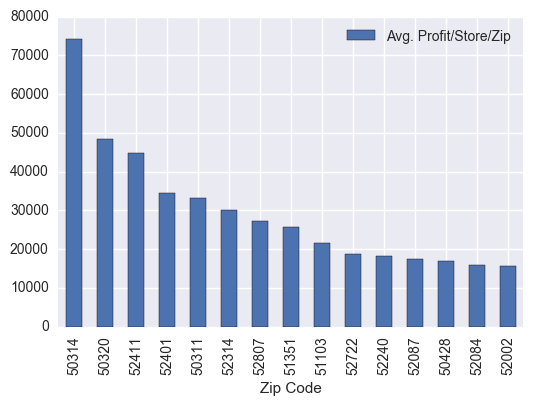

In [50]:
Plot1 = Sales_Zip_Profit.sort_values('Avg. Profit/Store/Zip', ascending=False).head(15).plot(kind='bar', x='Zip Code', y='Avg. Profit/Store/Zip')

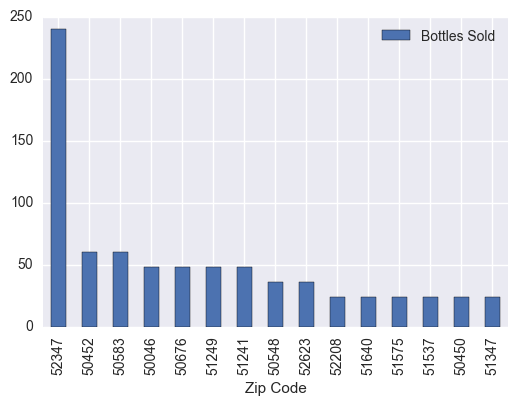

In [51]:
Plot2 = Sales_Zip_Profit.sort_values('Bottles Sold', ascending=False).head(15).plot(kind='bar', x='Zip Code', y='Bottles Sold')

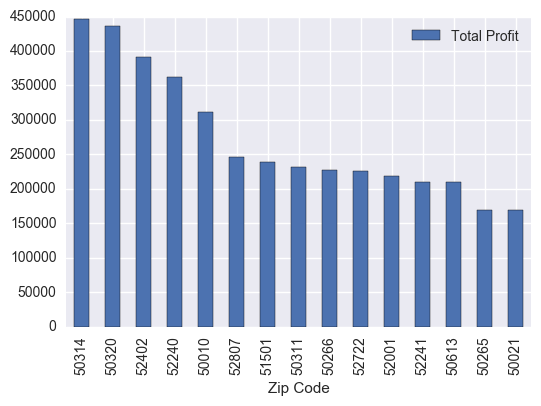

In [52]:
Plot1 = Sales_Zip_Profit.sort_values('Total Profit', ascending=False).head(15).plot(kind='bar', x='Zip Code', y='Total Profit')

In [53]:
print 'The maximum total profit per Zip Code is',Sales_Zip_Profit['Total Profit'].max()

The maximum total profit per Zip Code is 445877.6


In [54]:
print 'The maximum bottles sold per Zip Code is',Sales_Zip_Profit['Bottles Sold'].max()

The maximum bottles sold per Zip Code is 240


In [55]:
Sales_Zip_Profit.index = Sales_Zip_Profit['Zip Code'] #set the Zip code as an index 

In [56]:
Sales_Zip_Profit.drop(['Zip Code'], axis=1, inplace=True)

In [64]:
#Identifying top 20 zip codes by Total Sales 
Sales_Zip_Profit['Total Profit'].nlargest(20)

Zip Code
50314    445877.60
50320    435735.76
52402    391343.62
52240    361938.89
50010    311811.98
52807    245481.65
51501    238455.92
50311    231482.16
50266    227061.75
52722    225240.38
52001    218913.41
52241    210180.10
50613    209767.05
50265    169944.72
50021    168828.70
51106    166920.79
50703    160994.65
50401    160825.86
50702    160733.91
51503    160517.04
Name: Total Profit, dtype: float64

In [70]:
top_5 = Sales_Zip_Profit.sort_values('Total Profit', ascending=False).head()

In [71]:
top_5 

,Number of Stores,Avg. Profit/Store/Zip,Bottles Sold,Sales,Total Profit,Price per Bottle
Zip Code,,,,,,
50314,6.0,74312.933333,6,73.80,445877.60,12.30
50320,9.0,48415.084444,12,220.56,435735.76,18.38
52402,30.0,13044.787333,12,191.88,391343.62,15.99
52240,20.0,18096.944500,3,45.00,361938.89,15.00
50010,21.0,14848.189524,12,129.60,311811.98,10.80


In [73]:
top_20 = Sales_Zip_Profit.sort_values('Total Profit', ascending=False).head(20)

###### Here we see the top 20 zip codes in total sales in Iowa.  The first four show really high sales.  Also when looking at those top 5 stores we find zip codes 50314 and 50320 each have 6 and 9 stores respecitely.  Meaning It would not seem these markets or zip codes are oversaturated with stores.  Each of these stores tends to have higher bottles sold per store as well making any of these 5 zip codes ideal for setting up a new store.

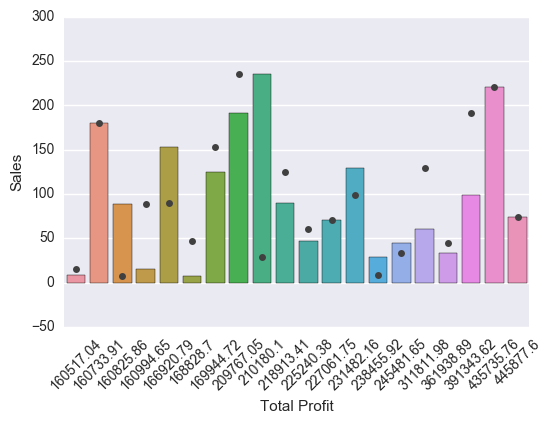

In [77]:
sns.set_palette("Set2", n_colors=10, desat=.3)
sales_top_20 = sns.barplot(x='Avg. Profit/Store/Zip', y='Sales', data=top_20)
plt.xticks(rotation=45) # makes the x value readable
sales_top_20 = sns.swarmplot(x='Total Profit', y="Sales", data=top_20, color=".25")

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [57]:
#Next, I am going to look at a scatter plot, containing the list of features from my dataframe Sales_Zip_Profit
#Lets see what features have positive correlation with my prediction of Avg. Profit/Store/Zip


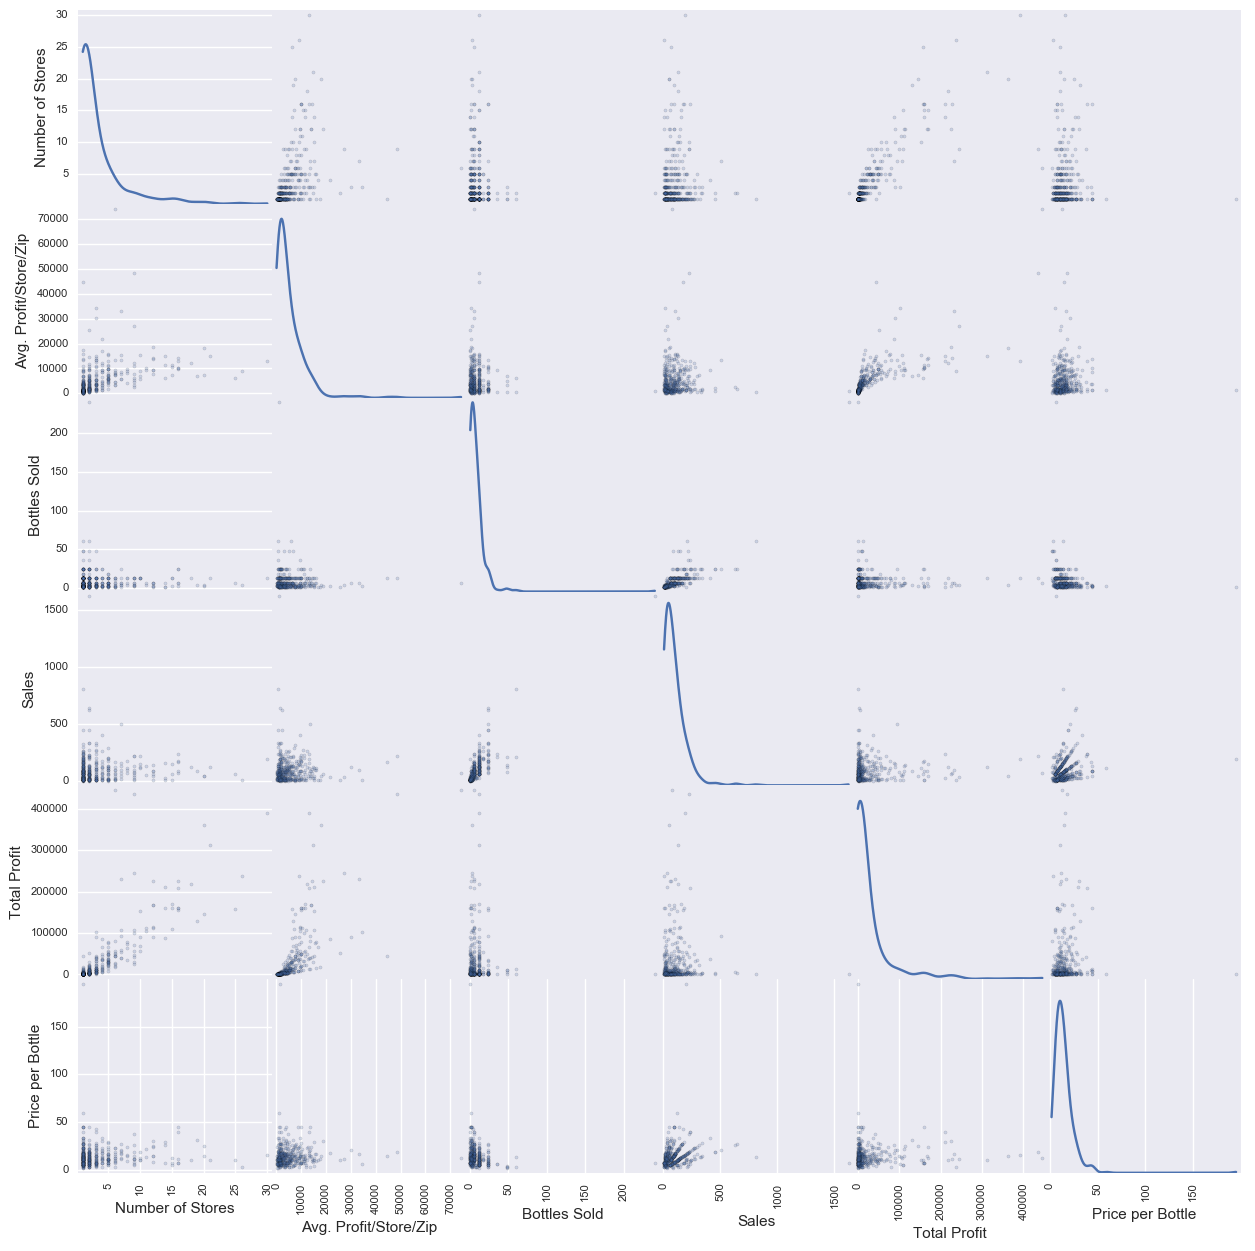

In [58]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline


Sample = Sales_Zip_Profit.sample(frac=0.01)

a = scatter_matrix(Sales_Zip_Profit, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [46]:
#My current scatter plot:  As I look to predict the best Average Profit per Store, it appears the 
#features 'Total Profit', 'Sales', and the 'Number of Stores' have the best correlation for Average Profit.  

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [47]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

cont_feats = ['Sales', 'Total Profit', 'Number of Stores', 'Avg. Profit/Store/Zip', 'Bottles Sold', 'Price per Bottle']
Sales_Zip_Profit[cont_feats] = StandardScaler().fit_transform(Sales_Zip_Profit[cont_feats])


In [59]:
#normalized Data Set 
Sales_Zip_Profit.head()

,Zip Code,Number of Stores,Avg. Profit/Store/Zip,Bottles Sold,Sales,Total Profit,Price per Bottle
0,50002,2.0,980.660000,12,81.00,1961.32,6.75
1,50003,3.0,5320.866667,2,41.26,15962.60,20.63
2,50006,2.0,2050.640000,24,453.36,4101.28,18.89
3,50009,9.0,11079.796667,6,85.50,99718.17,14.25
4,50010,21.0,14848.189524,12,129.60,311811.98,10.80


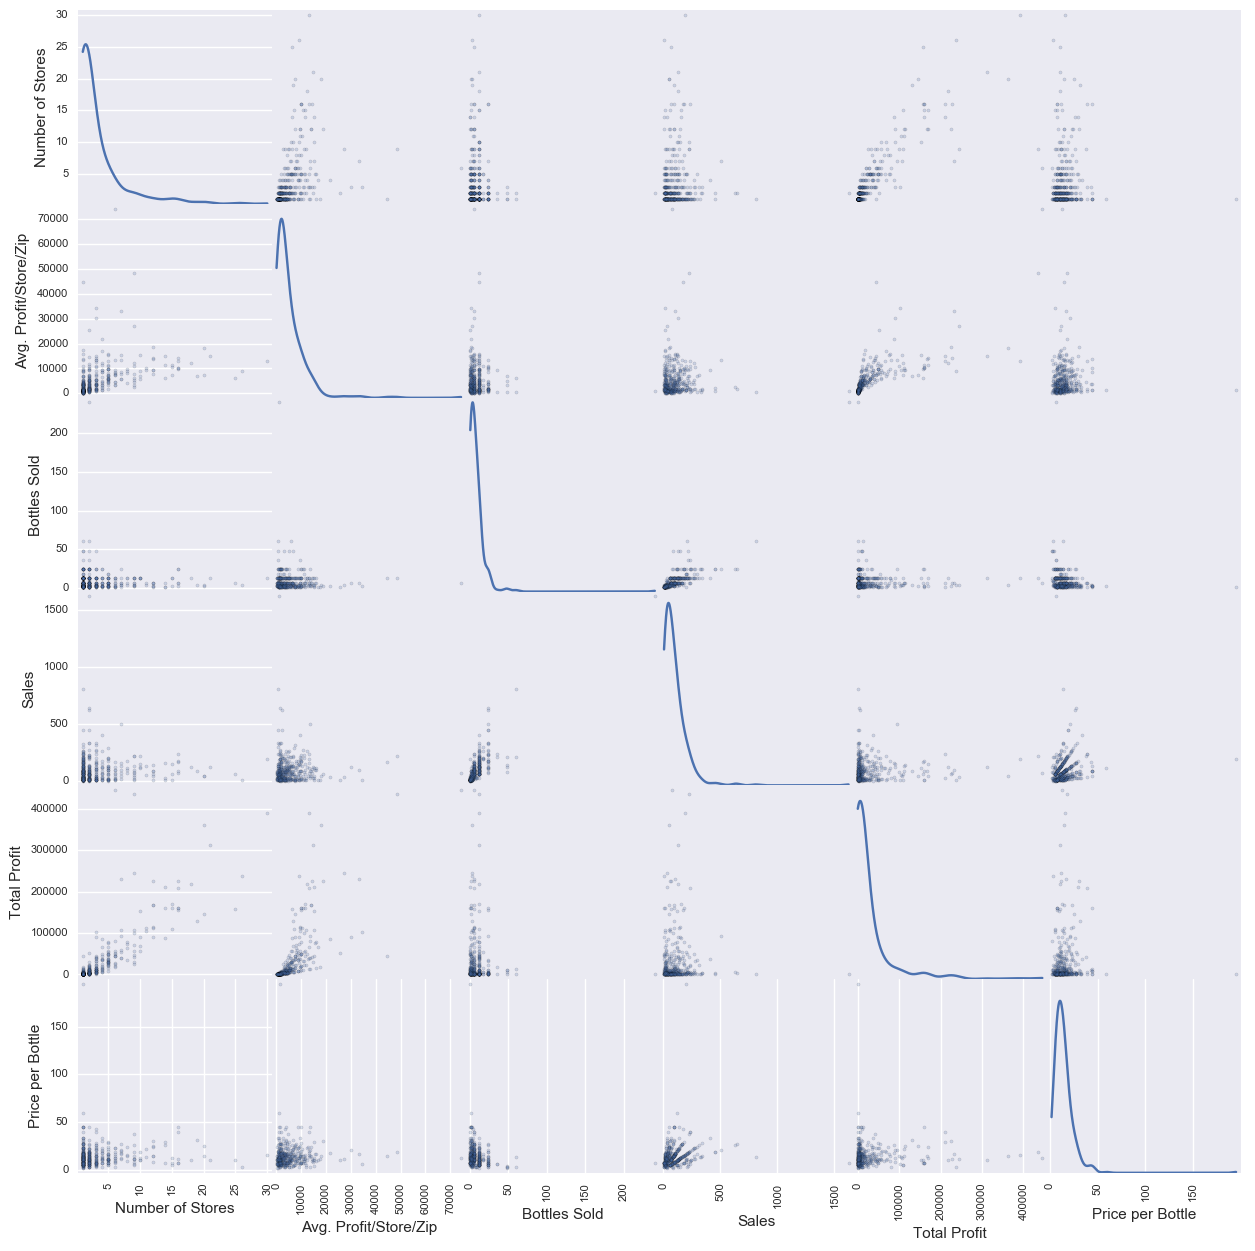

In [150]:
B =scatter_matrix(Sales_Zip_Profit, alpha=0.2, figsize=(15, 15), diagonal='kde')

In [50]:
from sklearn.cross_validation import KFold
kf = KFold(len(Sales_Zip_Profit), n_folds=10, shuffle=True, random_state=43)
kf

sklearn.cross_validation.KFold(n=414, n_folds=10, shuffle=True, random_state=43)

In [52]:
import patsy
import statsmodels.api as sm

y, X = patsy.dmatrices("Sales_Zip_Profit['Avg. Profit/Store/Zip'] ~ Sales_Zip_Profit['Sales'] + Sales_Zip_Profit['Bottles Sold'] + Sales_Zip_Profit['Total Profit'] + Sales_Zip_Profit['Price per Bottle']", data=Sales_Zip_Profit, return_type='dataframe')

models = sm.OLS(y, X)
results = models.fit()
print results.summary()



                                        OLS Regression Results                                       
Dep. Variable:     Sales_Zip_Profit['Avg. Profit/Store/Zip']   R-squared:                       0.537
Model:                                                   OLS   Adj. R-squared:                  0.533
Method:                                        Least Squares   F-statistic:                     118.6
Date:                                       Fri, 23 Sep 2016   Prob (F-statistic):           4.38e-67
Time:                                               14:03:40   Log-Likelihood:                -428.01
No. Observations:                                        414   AIC:                             866.0
Df Residuals:                                            409   BIC:                             886.2
Df Model:                                                  4                                         
Covariance Type:                                   nonrobust                      

In [53]:
#To cross validate I have to use code, provided by Jason, to remove spaces from column names
Sales_Zip_Profit.columns = [x.strip().replace(' ', '_') for x in Sales_Zip_Profit.columns]
Sales_Zip_Profit.head()


,Zip_Code,Number_of_Stores,Avg._Profit/Store/Zip,Bottles_Sold,Sales,Total_Profit,Price_per_Bottle
0,50002,-0.332312,-0.628303,0.249970,-0.140316,-0.440599,-0.629785
1,50003,-0.091371,0.019456,-0.455949,-0.467021,-0.205418,0.501482
2,50006,-0.332312,-0.468613,1.097074,2.920873,-0.404654,0.359666
3,50009,1.354275,0.878954,-0.173581,-0.103322,1.201433,-0.018510
4,50010,4.245569,1.441372,0.249970,0.259227,4.763994,-0.299696


In [54]:
#cross validation

from sklearn.cross_validation import train_test_split

# Split arrays or matrices into random train and test subsets
train, test = train_test_split(Sales_Zip_Profit, test_size = 0.2, random_state=42)



In [55]:
train[:5]

,Zip_Code,Number_of_Stores,Avg._Profit/Store/Zip,Bottles_Sold,Sales,Total_Profit,Price_per_Bottle
192,50846,-0.573254,-0.331151,-0.173581,-0.032785,-0.423628,0.098040
234,51249,-0.332312,-0.017272,2.791280,0.373664,-0.303061,-0.936238
5,50014,0.149570,-0.167031,-0.173581,0.179318,-0.199997,0.448505
45,50138,0.390511,0.164105,-0.173581,-0.286816,0.054730,-0.321702
245,51358,-0.573254,-0.596940,-0.455949,-0.624865,-0.453542,-0.280950


In [56]:
test[:5]

,Zip_Code,Number_of_Stores,Avg._Profit/Store/Zip,Bottles_Sold,Sales,Total_Profit,Price_per_Bottle
358,52361,-0.332312,0.012710,-0.526541,-0.670656,-0.296312,0.164058
350,52345,-0.573254,-0.624260,-0.173581,-0.065340,-0.456616,0.044248
373,52571,-0.573254,-0.409842,-0.455949,-0.621905,-0.432485,-0.266280
399,52751,-0.573254,-0.549286,-0.455949,-0.639170,-0.448178,-0.351858
369,52553,-0.573254,-0.577623,0.249970,0.821546,-0.451368,0.164873


In [57]:
from sklearn.cross_validation import KFold
kf = KFold(len(Sales_Zip_Profit), n_folds=10, shuffle=True, random_state=43)
kf

sklearn.cross_validation.KFold(n=414, n_folds=10, shuffle=True, random_state=43)

In [58]:
from sklearn.metrics import mean_squared_error

for train_index, test_index in kf:
    train_data_df = Sales_Zip_Profit.iloc[train_index]
    
    y, X = patsy.dmatrices("train_data_df['Avg._Profit/Store/Zip'] ~ train_data_df['Sales'] + train_data_df['Bottles_Sold'] + train_data_df['Total_Profit'] + train_data_df['Price_per_Bottle']", data=train_data_df, return_type='dataframe')
    
    model = sm.OLS(y, X)
   
    results = model.fit()
   
    test_data_df = Sales_Zip_Profit.iloc[test_index]
    y_test, X_test = patsy.dmatrices("test_data_df['Avg._Profit/Store/Zip'] ~ test_data_df['Sales'] + test_data_df['Bottles_Sold'] + test_data_df['Total_Profit'] + test_data_df['Price_per_Bottle']", data=test_data_df, return_type='dataframe')
    
    y_predicted = results.predict(X_test)
    
    print mean_squared_error(y_predicted, y_test)



0.270845417549
0.246324914135
0.489494333858
0.625872169115
0.258524197564
1.41603854152
0.216434071321
1.00780146437
0.296389649849
0.0603729366611


In [ ]:
sns.set_palette("Set2", n_colors=10, desat=.3)
sales_top_20 = sns.barplot(x=top_20, y='Total Sales', data=all_sales)
plt.xticks(rotation=45) # makes the x value readable
sales_top_20 = sns.swarmplot(x=top_20, y="Total Volume Sold (Liters)", data=all_sales, color=".25")


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.